# Bayes linear regression applied on datasets

In [139]:
import os, sys, importlib

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULE_PATH = os.path.join(BASE_PATH, "modules", "pipeline")
DATA_PATH = os.path.join(BASE_PATH, "datasets", "regression")


In [141]:
sys.path.append(MODULE_PATH)

import insurance as inds
importlib.reload(inds)

<module 'insurance' from '/home/jovyan/work/model/../../modules/pipeline/insurance.py'>

## Load dataset and pre-process

In [142]:
insurance_ds_path = os.path.join(DATA_PATH, "insurance_forecast.csv")
unprocessed_data = pd.read_csv(insurance_ds_path)

In [143]:
data = inds.preprocess(unprocessed_data)
data.head()

,age,bmi,children,smoker,charges
0,0.021739,0.321227,0.179479,1,0.251611
1,0.000000,0.479150,0.185308,0,0.009636
2,0.217391,0.458434,0.227195,0,0.053115
3,0.326087,0.181464,0.179479,0,0.333010
4,0.304348,0.347592,0.179479,0,0.043816


In [144]:
data.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.193916,0.204783,0.193916
std,0.305434,0.164062,0.021372,0.403694,0.193301
min,0.000000,0.000000,0.122336,0.000000,0.000000
25%,0.195652,0.278080,0.179479,0.000000,0.057757
50%,0.456522,0.388485,0.185308,0.000000,0.131849
75%,0.717391,0.504002,0.222698,0.000000,0.247700
max,1.000000,1.000000,0.227195,1.000000,1.000000


# Max Likelihood estimation of parameters

In [145]:
from sklearn import linear_model

In [146]:
x = data.to_numpy()[:, :-1]
y = data.to_numpy()[:, -1]

In [147]:
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(x, y)

LinearRegression()

In [148]:
a_ml = reg.coef_ # Per feature a coeff
b_ml = reg.intercept_ # y-axis intecept

In [149]:
print("Coefficients: ", a_ml)
print("Coefficient: ", b_ml)

Coefficients:  [0.18894509 0.19032793 0.39187699 0.37907363]
Coefficient:  -0.12209946211058195


In [150]:
def get_range(data, column):
    return (data[column].min(), data[column].max())

In [151]:
def gen_ml_plot_fn(x_range, y_range, sigma, x, y):
    
    x_min, x_max = x_range
    y_min, y_max = y_range
    plt.figure(figsize=(10, 5))

    def make_ml_plot(a, b, ax, f):
        """
            Plot max-likelihood of specific coefficient.

        """

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xlabel('x')
        ax.set_ylabel('y')

        ax.set_title("A = {:+.2f} b = {:+.2f}".format(a, b))
        
        print([a*x_min+b, a*x_max+b])

        x_min_max = [x_min, x_max]
        ax.plot(x_min_max, [a*x_min+b, a*x_max+b], color='black')
        ax.plot(x_min_max, [a*x_min+b+2*sigma, a*x_max+b+1.96*sigma], linestyle='dashed', alpha=0.5, color='black')
        ax.plot(x_min_max, [a*x_min+b-2*sigma, a*x_max+b-1.96*sigma], linestyle='dashed', alpha=0.5, color='black')

        ax.scatter(x, y, marker='o', color='r')
    
    return make_ml_plot

In [152]:
def plot_coff_ml(coff_index, a_ml, b, data, y_column="charges"):
    
    """
    
    """
    column = data.columns[coff_index]
    a = a_ml[coff_index]
    x_range = get_range(data, column)
    y_range = get_range(data, y_column)

    plot_fn = gen_ml_plot_fn(x_range, y_range, data["charges"].std(), data[column], data[y_column])
    
    plt.figure(figsize=(10, 5))
    f, ax = plt.subplots(1, 1)
    plot_fn(a, b, ax, f)

[-0.12209946211058195, 0.0682284681283715]


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

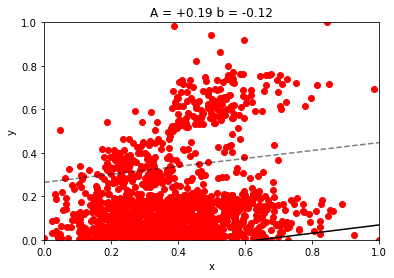

In [153]:
plot_coff_ml(1, a_ml, b_ml, data)

[-0.12209946211058195, 0.06684563037223415]


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

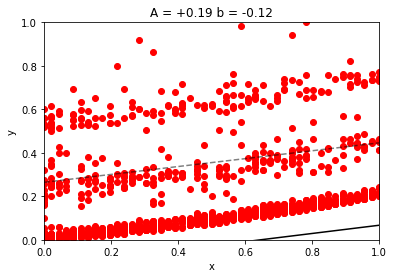

In [154]:
plot_coff_ml(0, a_ml, b_ml, data)

[-0.07415887474740511, -0.03306693043148351]


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

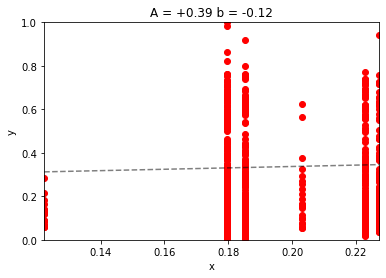

In [155]:
plot_coff_ml(2, a_ml, b_ml, data)